In [1]:

!pip uninstall -y numpy pmdarima
!pip install --no-cache-dir numpy==1.23.5 pmdarima --force-reinstall

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 141.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 229.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 133.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 192.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 151.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 179.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 155.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 15

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


# Step 1: Load the dataset
file_path = "NFLX (1).csv"  # Update with correct path
df = pd.read_csv(file_path)



📉 Original Data Stationarity:

 **ADF Test:**
Test Statistic: -1.8126
p-value: 0.3742
→ Non-Stationary

 **KPSS Test:**
Test Statistic: 3.9960
p-value: 0.0100
→ Non-Stationary

📈 After Differencing:

 **ADF Test:**
Test Statistic: -14.2423
p-value: 0.0000
→ Stationary

 **KPSS Test:**
Test Statistic: 0.1115
p-value: 0.1000
→ Stationary
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7703.000, Time=5.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7699.918, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7699.299, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7699.383, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7698.088, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7700.122, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.121 seconds

Selected ARIMA order: (0, 1, 0)


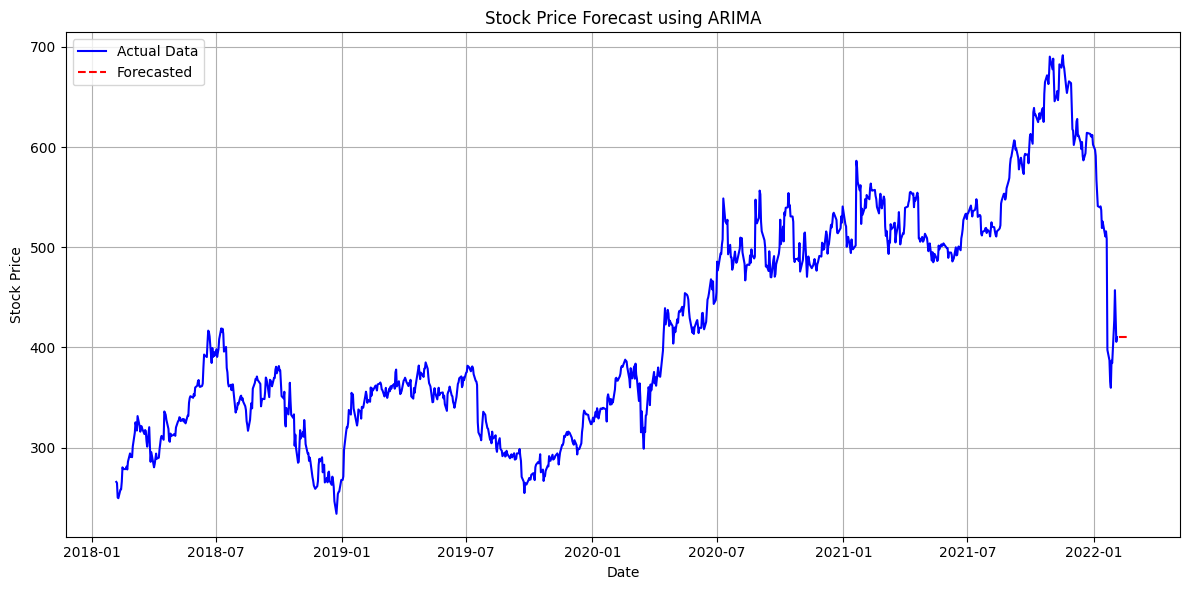


📊 Forecasted Stock Prices:
            Forecasted_Close
2022-02-07               NaN
2022-02-08               NaN
2022-02-09               NaN
2022-02-10               NaN
2022-02-11               NaN
2022-02-14               NaN
2022-02-15               NaN
2022-02-16               NaN
2022-02-17               NaN
2022-02-18               NaN
2022-02-21               NaN
2022-02-22               NaN


In [4]:
try:
    from statsmodels.tsa.stattools import adfuller, kpss
    from statsmodels.tsa.arima.model import ARIMA
    from pmdarima import auto_arima
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install statsmodels pmdarima seaborn
    from statsmodels.tsa.stattools import adfuller, kpss
    from statsmodels.tsa.arima.model import ARIMA
    from pmdarima import auto_arima

warnings.filterwarnings("ignore")


# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Work with 'Close' column
df = df[['Close']].copy()
df.rename(columns={'Close': 'Value'}, inplace=True)

# Fill missing values (if any)
df['Value'].fillna(method='ffill', inplace=True)

# Function to perform stationarity tests
def stationarity_tests(series):
    """Perform ADF and KPSS tests to check stationarity."""
    adf_result = adfuller(series)
    kpss_result = kpss(series, regression='c', nlags='auto')

    print("\n **ADF Test:**")
    print(f"Test Statistic: {adf_result[0]:.4f}")
    print(f"p-value: {adf_result[1]:.4f}")
    print("→ Stationary" if adf_result[1] < 0.05 else "→ Non-Stationary")

    print("\n **KPSS Test:**")
    print(f"Test Statistic: {kpss_result[0]:.4f}")
    print(f"p-value: {kpss_result[1]:.4f}")
    print("→ Stationary" if kpss_result[1] > 0.05 else "→ Non-Stationary")

# Test stationarity of original data
print("📉 Original Data Stationarity:")
stationarity_tests(df['Value'])

# First differencing
df['Value_diff'] = df['Value'].diff()
df.dropna(inplace=True)

print("\n📈 After Differencing:")
stationarity_tests(df['Value_diff'])

# Auto ARIMA to find best order (p,d,q)
auto_model = auto_arima(df['Value'], seasonal=False, stepwise=True, trace=True)
p, d, q = auto_model.order
print(f"\nSelected ARIMA order: ({p}, {d}, {q})")

# Fit ARIMA model
arima_model = ARIMA(df['Value'], order=(p, d, q))
arima_fit = arima_model.fit()

# Forecast future values (e.g., 12 periods)
forecast_steps = 12
forecast = arima_fit.forecast(steps=forecast_steps)

# Generate forecast index
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='B')[1:]  # Business days

# Plot actual data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Actual Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted', color='red', linestyle='dashed')
plt.title("Stock Price Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print forecasted values
forecast_df = pd.DataFrame({'Forecasted_Close': forecast}, index=forecast_index)
print("\n📊 Forecasted Stock Prices:")
print(forecast_df)